# 55 Opintopistettä suorittaneet

Tämä notebook avaa 55 opintopistettä suorittaneiden tilastoja.

In [1]:
# download the data to a local file
# thias may take a while
from urllib.request import urlretrieve

destination = "/tmp/ytl_arvosanat.json"
url = "http://api.vipunen.fi/api/resources/suorittanut55/data"
urlretrieve(url, destination)

('/tmp/ytl_arvosanat.json', <http.client.HTTPMessage at 0x7fbe642ab550>)

In [80]:
import pandas as pd
import json
with open(destination, "r") as file_:
    df = pd.DataFrame.from_records(json.load(file_))

df_original = df
df.head()


,koulutusKoodi,koulutusala(taso1),koulutusala(taso1)Koodi,koulutusala(taso2),koulutusala(taso2)Koodi,koulutusala(taso3),koulutusala(taso3)Koodi,koulutusaste(taso2),koulutusaste(taso2)Koodi,koulutusnimike,okmOhjauksenAla,okmOhjauksenAlaKoodi,oppilaitos,oppilaitosKoodi,suorittanut55,vuosi
0,581154,Palvelualat,10,Henkilökohtaiset palvelut,101,Hotelli- ja ravintola-ala,1013,"Short-cycle tertiary education, Vocational",55,Restonomi,Palvelualat,12,Metropolia Ammattikorkeakoulu,10065,49,2008
1,581154,Palvelualat,10,Henkilökohtaiset palvelut,101,Hotelli- ja ravintola-ala,1013,"Short-cycle tertiary education, Vocational",55,Restonomi,Palvelualat,12,Metropolia Ammattikorkeakoulu,10065,56,2007
2,581154,Palvelualat,10,Henkilökohtaiset palvelut,101,Hotelli- ja ravintola-ala,1013,"Short-cycle tertiary education, Vocational",55,Restonomi,Palvelualat,12,Metropolia Ammattikorkeakoulu,10065,51,2006
3,611101,Kasvatusalat,01,Kasvatusalat,011,Aineenopettajien koulutus,0114,"Bachelor's or equivalent level, Orientation un...",66,Musiikkipedagogi (AMK),Kasvatusalat,1,Metropolia Ammattikorkeakoulu,10065,200,2007
4,611101,Kasvatusalat,01,Kasvatusalat,011,Aineenopettajien koulutus,0114,"Bachelor's or equivalent level, Orientation un...",66,Musiikkipedagogi (AMK),Kasvatusalat,1,Metropolia Ammattikorkeakoulu,10065,228,2013


Data sisältää yleisiä alakoodeja 3 tasossa, sekä oppilaitoksen ja vuoden. Jokaisesta koulutusohjelmasta raportoidaan yksi luku vuotta kohti.

`oppilaitos` on kenttänä yksiselitteinen. Ei ole täysin selvää miksi sana Ammattikorkeakoulu kirjoitetaan isolla Metropolian yhteydesä mutta pienellä muuten.

`okmOhjauksenAla` ei ole suoraan selkeä, eikä datasetin yhteydessä ole hyvää selitystä koodista ja sen tulkitsemisesta. Opetusalaa paremmin tuntevat saattavat tietää mihin jaottelu perustuu.

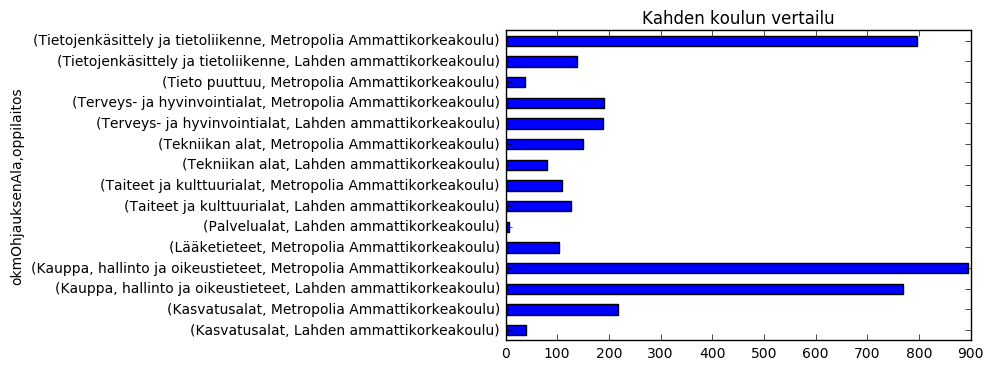

In [45]:
to_compare = "Lahden ammattikorkeakoulu", "Metropolia Ammattikorkeakoulu"
df[df["oppilaitos"].isin(to_compare)].groupby(["okmOhjauksenAla", "oppilaitos"])["suorittanut55"].mean().plot.barh(title="Kahden koulun vertailu")

On helppo huomata, että vertailu ilman normalisointia on merkityksetöntä: ei ole tiedossa montako opiskelijaa ylipäänsä olisi voinut saada 55op kussakin opinahjossa.

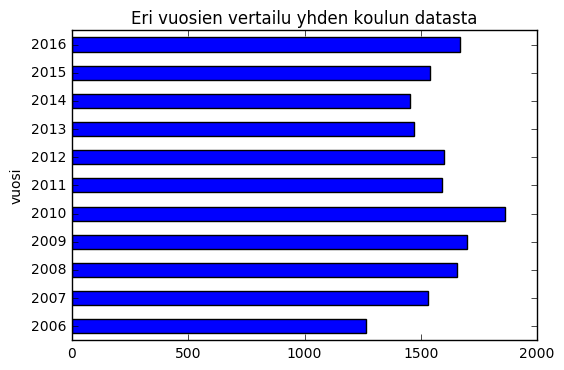

In [49]:
df_original[df_original["oppilaitos"] == "Lappeenrannan teknillinen yliopisto"]\
    .groupby(["vuosi"])["suorittanut55"].sum().plot.barh(title="Eri vuosien vertailu yhden koulun datasta")

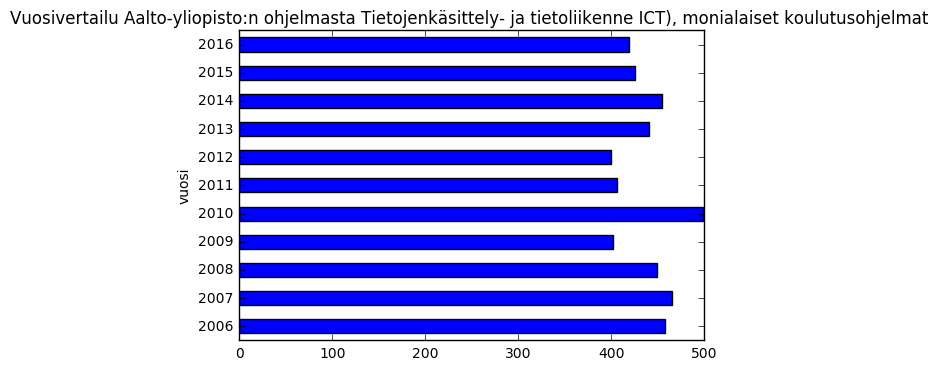

In [79]:
field = "Tietojenkäsittely- ja tietoliikenne ICT), monialaiset koulutusohjelmat "
school = "Aalto-yliopisto"

title = "Vuosivertailu {0}:n ohjelmasta {1}".format(school, field)

df_original[(df_original["oppilaitos"] == school) 
             & (df_original["koulutusala(taso3)"] == field)
            ].groupby(["vuosi"])["suorittanut55"].sum().plot.barh(title=title)